In [1]:
import warnings

warnings.simplefilter("ignore")

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as ssb



In [4]:
accidentes = pd.read_csv("C:/Users/sergi/Repositorios/modalidad/DataSet/Accidentalidad.csv",encoding='utf-8')

In [319]:
accidentes.head(5)

,X,Y,OBJECTID,RADICADO,FECHA,HORA,DIA,PERIODO,CLASE,DIRECCION,DIRECCION_ENC,CBML,TIPO_GEOCOD,GRAVEDAD,BARRIO,COMUNA,DISENO,DIA_NOMBRE,MES,MES_NOMBRE
0,-75.584608,6.261152,550556,1612819.0,2018-01-14T00:00:00.000Z,01:30 PM,14,2018,Choque,CR 70 CL 55,CR 070 055 000 00000,1101,Malla vial,HERIDO,Carlos E. Restrepo,Laureles Estadio,Interseccion,DOMINGO,1,ENERO
1,-75.582266,6.293102,550557,1612866.0,2018-01-14T00:00:00.000Z,01:30 PM,14,2018,Choque,CR 79 CL 95,CR 079 095 000 00000,606,Malla vial,SOLO DAÑOS,San Martín de Porres,Doce de Octubre,Tramo de via,DOMINGO,1,ENERO
2,-75.560337,6.252080,550558,1612809.0,2018-01-14T00:00:00.000Z,02:30 PM,14,2018,Caida Ocupante,CR 43 CL 57,CR 043 057 000 00000,1017,Malla vial,HERIDO,Los Ángeles,La Candelaria,Tramo de via,DOMINGO,1,ENERO
3,-75.597828,6.222382,550559,1612812.0,2018-01-14T00:00:00.000Z,02:30 PM,14,2018,Otro,CR 76 CL 16,CR 076 016 000 00000,1605,Malla vial,HERIDO,San Bernardo,Belén,Interseccion,DOMINGO,1,ENERO
4,-75.561804,6.236754,550560,1612817.0,2018-01-14T00:00:00.000Z,02:37 PM,14,2018,Choque,CR 36 CL 39,CR 036 039 000 00000,912,Malla vial,SOLO DAÑOS,El Salvador,Buenos Aires,Tramo de via,DOMINGO,1,ENERO


In [320]:
accidentes.shape

(71237, 20)

Cambiamos el nombre de la columna DIA_NOMBRE por DIA_NUMERO y factorizamos

In [321]:
accidentes = accidentes.rename(columns={'DIA_NOMBRE':'DIA_SEMANA'})


accidentes['DIA_SEMANA'] = pd.factorize(accidentes['DIA_SEMANA'])[0]




In [322]:
accidentes['DIA_SEMANA'].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)


Factorizamos los dias de la comuna

In [323]:
accidentes['NUM_COMUNA'] = accidentes['COMUNA']

accidentes['NUM_COMUNA'] = pd.factorize(accidentes['NUM_COMUNA'])[0]

In [324]:
accidentes['NUM_GRAVEDAD'] = accidentes['GRAVEDAD']

print(f'Faztorizamos la columna GRAVEDAD donde\n')
print(f'0 = HERIDO\n1 = SOLO DAÑOS\n2 = MUERTO')



Faztorizamos la columna GRAVEDAD donde

0 = HERIDO
1 = SOLO DAÑOS
2 = MUERTO


In [325]:
accidentes['NUM_GRAVEDAD'].value_counts()

HERIDO        37418
SOLO DAÑOS    33375
MUERTO          444
Name: NUM_GRAVEDAD, dtype: int64

In [326]:
accidentes['NUM_GRAVEDAD'] = pd.factorize(accidentes['NUM_GRAVEDAD'])[0]

In [327]:
accidentes['NUM_DISENO'] = accidentes['DISENO']

print(f'Cambiamos los valores de la columna DISENO donde\n')
print(f'0 = Tramo de via\n1 = Interseccion\n2 = Lote o Predio\n3 = Glorieta\n4 = Paso Inferior\n5 = Paso Elevado\n6 = Puente\n7 = Ciclo Ruta\n8 = Paso a Nivel\n9 = Via peatonal\n10 = Tunel\n11 = Pontón')



Cambiamos los valores de la columna DISENO donde

0 = Tramo de via
1 = Interseccion
2 = Lote o Predio
3 = Glorieta
4 = Paso Inferior
5 = Paso Elevado
6 = Puente
7 = Ciclo Ruta
8 = Paso a Nivel
9 = Via peatonal
10 = Tunel
11 = Pontón


In [328]:
accidentes['NUM_DISENO'] = pd.factorize(accidentes['NUM_DISENO'])[0]

In [329]:
accidentes['NUM_CLASE'] = accidentes['CLASE']


print(f'Cambiamos los valores de la columna CLASE donde\n')
print(f'0 = Choque\n1 = Atropello\n2 = Volcamiento\n3 = Caida Ocupante\n4 = Incendio\n5 = Otro\n')


Cambiamos los valores de la columna CLASE donde

0 = Choque
1 = Atropello
2 = Volcamiento
3 = Caida Ocupante
4 = Incendio
5 = Otro



In [330]:
accidentes['NUM_CLASE'] = pd.factorize(accidentes['NUM_CLASE'])[0]

In [331]:
accidentes['NUM_BARRIO'] = accidentes['BARRIO']


accidentes['NUM_BARRIO'] = pd.factorize(accidentes['NUM_BARRIO'])[0]

In [332]:
accidentes.columns

Index(['X', 'Y', 'OBJECTID', 'RADICADO', 'FECHA', 'HORA', 'DIA', 'PERIODO',
       'CLASE', 'DIRECCION', 'DIRECCION_ENC', 'CBML', 'TIPO_GEOCOD',
       'GRAVEDAD', 'BARRIO', 'COMUNA', 'DISENO', 'DIA_SEMANA', 'MES',
       'MES_NOMBRE', 'NUM_COMUNA', 'NUM_GRAVEDAD', 'NUM_DISENO', 'NUM_CLASE',
       'NUM_BARRIO'],
      dtype='object')

In [333]:
accidentes.head(10)

,X,Y,OBJECTID,RADICADO,FECHA,HORA,DIA,PERIODO,CLASE,DIRECCION,...,COMUNA,DISENO,DIA_SEMANA,MES,MES_NOMBRE,NUM_COMUNA,NUM_GRAVEDAD,NUM_DISENO,NUM_CLASE,NUM_BARRIO
0,-75.584608,6.261152,550556,1612819.0,2018-01-14T00:00:00.000Z,01:30 PM,14,2018,Choque,CR 70 CL 55,...,Laureles Estadio,Interseccion,0,1,ENERO,0,0,0,0,0
1,-75.582266,6.293102,550557,1612866.0,2018-01-14T00:00:00.000Z,01:30 PM,14,2018,Choque,CR 79 CL 95,...,Doce de Octubre,Tramo de via,0,1,ENERO,1,1,1,0,1
2,-75.560337,6.252080,550558,1612809.0,2018-01-14T00:00:00.000Z,02:30 PM,14,2018,Caida Ocupante,CR 43 CL 57,...,La Candelaria,Tramo de via,0,1,ENERO,2,0,1,1,2
3,-75.597828,6.222382,550559,1612812.0,2018-01-14T00:00:00.000Z,02:30 PM,14,2018,Otro,CR 76 CL 16,...,Belén,Interseccion,0,1,ENERO,3,0,0,2,3
4,-75.561804,6.236754,550560,1612817.0,2018-01-14T00:00:00.000Z,02:37 PM,14,2018,Choque,CR 36 CL 39,...,Buenos Aires,Tramo de via,0,1,ENERO,4,1,1,0,4
5,-75.554249,6.262941,550562,1612856.0,2018-01-14T00:00:00.000Z,03:00 PM,14,2018,Atropello,CR 44 CL 67,...,Manrique,Tramo de via,0,1,ENERO,5,0,1,3,5
6,-75.591549,6.244591,550563,1612823.0,2018-01-14T00:00:00.000Z,03:30 PM,14,2018,Choque,CQ 2 CR 72,...,Laureles Estadio,Interseccion,0,1,ENERO,0,1,0,0,6
7,-75.572067,6.234996,550564,1612825.0,2018-01-14T00:00:00.000Z,04:00 PM,14,2018,Choque,CL 34 CR 46,...,La Candelaria,Lote o Predio,0,1,ENERO,2,1,2,0,7
8,-75.599717,6.250105,550565,1612850.0,2018-01-14T00:00:00.000Z,04:10 PM,14,2018,Choque,CL 44 CR 80,...,La América,Tramo de via,0,1,ENERO,6,1,1,0,8
9,-75.578964,6.288339,550566,1612815.0,2018-01-14T00:00:00.000Z,04:20 PM,14,2018,Caida Ocupante,CR 74 CL 92,...,Doce de Octubre,Interseccion,0,1,ENERO,1,0,0,1,9


Eliminamos las filas que contenian datos vacios, para contar con la misma dimension de los mismos

In [334]:
#Eliminamos las filas de las columnas que no tienen información   
accidentes = accidentes.drop(accidentes[accidentes['COMUNA']=='Sin Inf'].index)

accidentes.drop(accidentes[accidentes.CBML.isnull()].index, inplace = True)
accidentes.drop(accidentes[accidentes.BARRIO.isnull()].index, inplace = True)
accidentes.drop(accidentes[accidentes.COMUNA.isnull()].index, inplace = True)
accidentes.drop(accidentes[accidentes.DISENO.isnull()].index, inplace = True)
accidentes.drop(accidentes[accidentes.GRAVEDAD.isnull()].index, inplace = True)

accidentes.shape

(70919, 25)

In [335]:
accidentes['NUM_COMUNA'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20], dtype=int64)

cambiamos el tipo de dato de Object a int en las columnas DIA_NUMERO,CBML,NUM_COMUNA

In [336]:
#accidentes[['DIA_SEMANA','CBML','NUM_DISENO','NUM_BARRIO','NUM_CLASE','NUM_GRAVEDAD','NUM_COMUNA']] = accidentes[['DIA_SEMANA','CBML','NUM_DISENO','NUM_BARRIO','NUM_CLASE','NUM_GRAVEDAD','NUM_COMUNA']].astype('int64')



In [337]:
accidentes.columns

Index(['X', 'Y', 'OBJECTID', 'RADICADO', 'FECHA', 'HORA', 'DIA', 'PERIODO',
       'CLASE', 'DIRECCION', 'DIRECCION_ENC', 'CBML', 'TIPO_GEOCOD',
       'GRAVEDAD', 'BARRIO', 'COMUNA', 'DISENO', 'DIA_SEMANA', 'MES',
       'MES_NOMBRE', 'NUM_COMUNA', 'NUM_GRAVEDAD', 'NUM_DISENO', 'NUM_CLASE',
       'NUM_BARRIO'],
      dtype='object')

In [338]:
accidentes.shape

(70919, 25)

In [339]:
linea = accidentes.loc[10,:]
linea

X                                -75.5697
Y                                 6.25662
OBJECTID                           550567
RADICADO                       1.6128e+06
FECHA            2018-01-14T00:00:00.000Z
HORA                             04:30 PM
DIA                                    14
PERIODO                              2018
CLASE                              Choque
DIRECCION                     CR 54 CL 57
DIRECCION_ENC    CR  054   057  000 00000
CBML                                 1005
TIPO_GEOCOD                    Malla vial
GRAVEDAD                           HERIDO
BARRIO                     Estación Villa
COMUNA                      La Candelaria
DISENO                       Interseccion
DIA_SEMANA                              0
MES                                     1
MES_NOMBRE                          ENERO
NUM_COMUNA                              2
NUM_GRAVEDAD                            0
NUM_DISENO                              0
NUM_CLASE                         

# Inspeccionar nuestros datos

In [340]:
accidentes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70919 entries, 0 to 71236
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   X              70919 non-null  float64
 1   Y              70919 non-null  float64
 2   OBJECTID       70919 non-null  int64  
 3   RADICADO       70919 non-null  float64
 4   FECHA          70919 non-null  object 
 5   HORA           70919 non-null  object 
 6   DIA            70919 non-null  int64  
 7   PERIODO        70919 non-null  int64  
 8   CLASE          70919 non-null  object 
 9   DIRECCION      70919 non-null  object 
 10  DIRECCION_ENC  70919 non-null  object 
 11  CBML           70919 non-null  object 
 12  TIPO_GEOCOD    70919 non-null  object 
 13  GRAVEDAD       70919 non-null  object 
 14  BARRIO         70919 non-null  object 
 15  COMUNA         70919 non-null  object 
 16  DISENO         70919 non-null  object 
 17  DIA_SEMANA     70919 non-null  int64  
 18  MES   

Columnas numericas y columnas de texto



In [341]:
(accidentes.dtypes != object)


X                 True
Y                 True
OBJECTID          True
RADICADO          True
FECHA            False
HORA             False
DIA               True
PERIODO           True
CLASE            False
DIRECCION        False
DIRECCION_ENC    False
CBML             False
TIPO_GEOCOD      False
GRAVEDAD         False
BARRIO           False
COMUNA           False
DISENO           False
DIA_SEMANA        True
MES               True
MES_NOMBRE       False
NUM_COMUNA        True
NUM_GRAVEDAD      True
NUM_DISENO        True
NUM_CLASE         True
NUM_BARRIO        True
dtype: bool

In [342]:
accidentes.dtypes == object


X                False
Y                False
OBJECTID         False
RADICADO         False
FECHA             True
HORA              True
DIA              False
PERIODO          False
CLASE             True
DIRECCION         True
DIRECCION_ENC     True
CBML              True
TIPO_GEOCOD       True
GRAVEDAD          True
BARRIO            True
COMUNA            True
DISENO            True
DIA_SEMANA       False
MES              False
MES_NOMBRE        True
NUM_COMUNA       False
NUM_GRAVEDAD     False
NUM_DISENO       False
NUM_CLASE        False
NUM_BARRIO       False
dtype: bool

In [343]:
num = (accidentes.dtypes != object )
num.index

Index(['X', 'Y', 'OBJECTID', 'RADICADO', 'FECHA', 'HORA', 'DIA', 'PERIODO',
       'CLASE', 'DIRECCION', 'DIRECCION_ENC', 'CBML', 'TIPO_GEOCOD',
       'GRAVEDAD', 'BARRIO', 'COMUNA', 'DISENO', 'DIA_SEMANA', 'MES',
       'MES_NOMBRE', 'NUM_COMUNA', 'NUM_GRAVEDAD', 'NUM_DISENO', 'NUM_CLASE',
       'NUM_BARRIO'],
      dtype='object')

In [344]:
for i in num.index:
    print(i)

X
Y
OBJECTID
RADICADO
FECHA
HORA
DIA
PERIODO
CLASE
DIRECCION
DIRECCION_ENC
CBML
TIPO_GEOCOD
GRAVEDAD
BARRIO
COMUNA
DISENO
DIA_SEMANA
MES
MES_NOMBRE
NUM_COMUNA
NUM_GRAVEDAD
NUM_DISENO
NUM_CLASE
NUM_BARRIO


In [345]:
num_cols = [c for c in num.index if num[c]]

In [346]:
num_cols

['X',
 'Y',
 'OBJECTID',
 'RADICADO',
 'DIA',
 'PERIODO',
 'DIA_SEMANA',
 'MES',
 'NUM_COMUNA',
 'NUM_GRAVEDAD',
 'NUM_DISENO',
 'NUM_CLASE',
 'NUM_BARRIO']

In [347]:
accidentes.dtypes == object

X                False
Y                False
OBJECTID         False
RADICADO         False
FECHA             True
HORA              True
DIA              False
PERIODO          False
CLASE             True
DIRECCION         True
DIRECCION_ENC     True
CBML              True
TIPO_GEOCOD       True
GRAVEDAD          True
BARRIO            True
COMUNA            True
DISENO            True
DIA_SEMANA       False
MES              False
MES_NOMBRE        True
NUM_COMUNA       False
NUM_GRAVEDAD     False
NUM_DISENO       False
NUM_CLASE        False
NUM_BARRIO       False
dtype: bool

In [348]:
obj = (accidentes.dtypes == object)
obj_cols =  [c for c in obj.index if obj[c]]

In [349]:
obj_cols

['FECHA',
 'HORA',
 'CLASE',
 'DIRECCION',
 'DIRECCION_ENC',
 'CBML',
 'TIPO_GEOCOD',
 'GRAVEDAD',
 'BARRIO',
 'COMUNA',
 'DISENO',
 'MES_NOMBRE']

In [350]:
accidentes_num = accidentes[num_cols]
accidentes_obj = accidentes[obj_cols]

In [351]:
accidentes_obj.to_csv("C:/Users/sergi/Repositorios/modalidad/Dataset/accidentes_obj.csv",index = False)

# Estadisticas de las columnas

In [352]:
accidentes_num.describe()

,X,Y,OBJECTID,RADICADO,DIA,PERIODO,DIA_SEMANA,MES,NUM_COMUNA,NUM_GRAVEDAD,NUM_DISENO,NUM_CLASE,NUM_BARRIO
count,70919.000000,70919.000000,70919.000000,7.091900e+04,70919.000000,70919.000000,70919.000000,70919.000000,70919.000000,70919.000000,70919.000000,70919.000000,70919.000000
mean,-75.576975,6.250309,669752.805764,1.650460e+06,15.610316,2018.435173,3.190866,6.013748,6.143544,0.476572,1.131911,0.675094,88.884558
std,0.019243,0.028630,65454.039651,2.245798e+04,8.693016,0.495783,1.908569,3.147214,4.647647,0.506073,1.039309,1.151718,68.531707
min,-75.701661,6.167576,549556.000000,1.611518e+06,1.000000,2018.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-75.586220,6.231916,662520.500000,1.631016e+06,8.000000,2018.000000,2.000000,3.000000,2.000000,0.000000,1.000000,0.000000,32.000000
50%,-75.574758,6.250098,681666.000000,1.650273e+06,16.000000,2018.000000,3.000000,6.000000,6.000000,0.000000,1.000000,0.000000,70.000000
75%,-75.564990,6.271538,722987.500000,1.669974e+06,23.000000,2019.000000,5.000000,8.000000,9.000000,1.000000,1.000000,1.000000,132.000000
max,-75.504666,6.368394,742352.000000,1.689537e+06,31.000000,2019.000000,6.000000,12.000000,20.000000,2.000000,11.000000,5.000000,324.000000


# Observando los datos con graficos

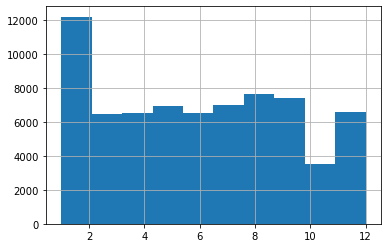

In [353]:
accidentes_num['MES'].hist()

In [354]:
accidentes_num['MES'].unique()

array([ 1,  2,  3,  4,  5,  7,  6,  8, 10,  9, 11, 12], dtype=int64)

In [355]:



for i in range(12):
       
    meses = (accidentes_num['MES'] == i+1 ).value_counts()
    print(f'mes {i}\n {meses}\n ')
           


mes 0
 False    65062
True      5857
Name: MES, dtype: int64
 
mes 1
 False    64555
True      6364
Name: MES, dtype: int64
 
mes 2
 False    64460
True      6459
Name: MES, dtype: int64
 
mes 3
 False    64408
True      6511
Name: MES, dtype: int64
 
mes 4
 False    63950
True      6969
Name: MES, dtype: int64
 
mes 5
 False    64387
True      6532
Name: MES, dtype: int64
 
mes 6
 False    63903
True      7016
Name: MES, dtype: int64
 
mes 7
 False    63238
True      7681
Name: MES, dtype: int64
 
mes 8
 False    63512
True      7407
Name: MES, dtype: int64
 
mes 9
 False    67413
True      3506
Name: MES, dtype: int64
 
mes 10
 False    67678
True      3241
Name: MES, dtype: int64
 
mes 11
 False    67543
True      3376
Name: MES, dtype: int64
 


In [356]:
accidentes.shape

(70919, 25)

# Buscando datos faltantes (nulos o NaN)

In [357]:
accidentes_num.notnull().apply(pd.Series.value_counts)

,X,Y,OBJECTID,RADICADO,DIA,PERIODO,DIA_SEMANA,MES,NUM_COMUNA,NUM_GRAVEDAD,NUM_DISENO,NUM_CLASE,NUM_BARRIO
True,70919,70919,70919,70919,70919,70919,70919,70919,70919,70919,70919,70919,70919


In [358]:
(accidentes_num != 0).apply(pd.Series.value_counts)

,X,Y,OBJECTID,RADICADO,DIA,PERIODO,DIA_SEMANA,MES,NUM_COMUNA,NUM_GRAVEDAD,NUM_DISENO,NUM_CLASE,NUM_BARRIO
False,NaN,NaN,NaN,NaN,NaN,NaN,6468,NaN,7712,37357,13589,49296,956
True,70919.0,70919.0,70919.0,70919.0,70919.0,70919.0,64451,70919.0,63207,33562,57330,21623,69963


In [359]:
from sklearn.impute import SimpleImputer as Imputer
imputer = Imputer(missing_values=np.nan, strategy='mean')

In [360]:
values = imputer.fit_transform(accidentes_num)

In [361]:
#Array numpy

accidentes_num.values


array([[-7.55846082e+01,  6.26115208e+00,  5.50556000e+05, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-7.55822656e+01,  6.29310209e+00,  5.50557000e+05, ...,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-7.55603371e+01,  6.25208040e+00,  5.50558000e+05, ...,
         1.00000000e+00,  1.00000000e+00,  2.00000000e+00],
       ...,
       [-7.55542974e+01,  6.30033736e+00,  7.41809000e+05, ...,
         1.00000000e+00,  2.00000000e+00,  1.40000000e+02],
       [-7.56025386e+01,  6.24321643e+00,  7.41810000e+05, ...,
         1.00000000e+00,  0.00000000e+00,  6.20000000e+01],
       [-7.55612869e+01,  6.29231249e+00,  7.41811000e+05, ...,
         1.00000000e+00,  0.00000000e+00,  2.42000000e+02]])

In [362]:
x = pd.DataFrame(values)

In [363]:
x.columns = accidentes_num.columns

In [364]:
x.index = accidentes_num.index

In [365]:
x.head()

,X,Y,OBJECTID,RADICADO,DIA,PERIODO,DIA_SEMANA,MES,NUM_COMUNA,NUM_GRAVEDAD,NUM_DISENO,NUM_CLASE,NUM_BARRIO
0,-75.584608,6.261152,550556.0,1612819.0,14.0,2018.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-75.582266,6.293102,550557.0,1612866.0,14.0,2018.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
2,-75.560337,6.252080,550558.0,1612809.0,14.0,2018.0,0.0,1.0,2.0,0.0,1.0,1.0,2.0
3,-75.597828,6.222382,550559.0,1612812.0,14.0,2018.0,0.0,1.0,3.0,0.0,0.0,2.0,3.0
4,-75.561804,6.236754,550560.0,1612817.0,14.0,2018.0,0.0,1.0,4.0,1.0,1.0,0.0,4.0


In [366]:
accidentes['NUM_GRAVEDAD'].unique()

array([0, 1, 2], dtype=int64)

In [367]:
x.to_csv("C:/Users/sergi/Repositorios/modalidad/Dataset/X.csv",index = False)